In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score , ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# Load the bank data from CSV (update the path as needed)
bank_data = pd.read_csv('bank-marketing.csv', delimiter=';')

bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [3]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [4]:
categorical_cols = ['job','marital','education','default','housing','loan',
                    'contact','month','day_of_week','poutcome']

In [5]:
pre = pd.get_dummies(bank_data, columns=categorical_cols, drop_first=True)

In [6]:
X = pre.drop('y', axis=1)
y = pre['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred = rf.predict(X_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))



Accuracy: 0.9146637533381888
Precision: 0.6760961810466761
Recall: 0.5021008403361344
F1 Score: 0.5762507534659433


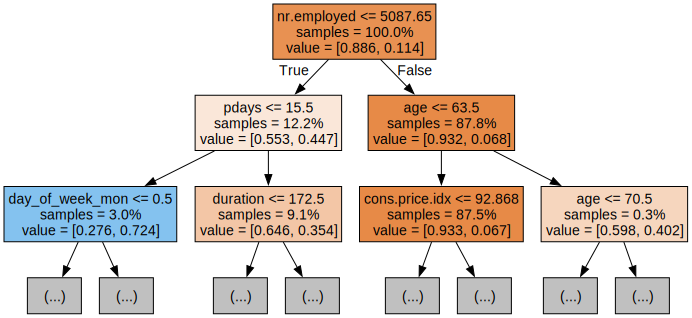

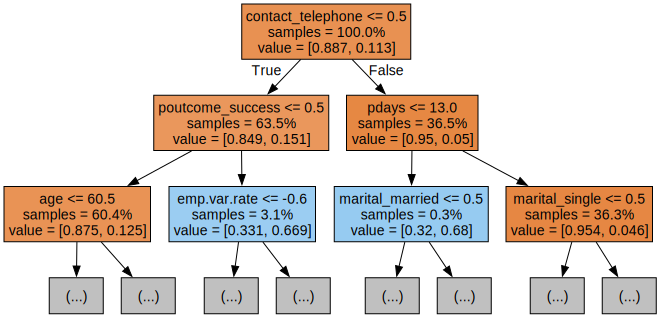

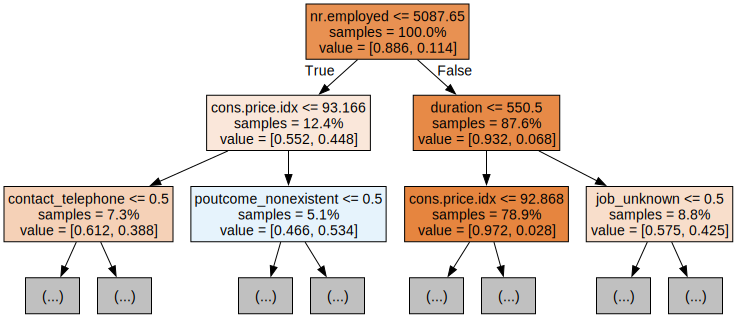

In [10]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [12]:
param_dist = {
    'n_estimators': randint(50, 150),   # reduced range
    'max_depth': randint(2, 10)         # reduced range
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=5,        # number of random combinations to try
    cv=3,            # reduced folds (faster than 5)
    n_jobs=-1,       # use all CPU cores
    verbose=2,       # show progress while training
    random_state=42
)

print("Starting RandomizedSearchCV...")

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

Starting RandomizedSearchCV...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....0029FFD136F10>, 'n_estimators': <scipy.stats....0029FFD137D10>}"
,n_iter,5
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [13]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 132}


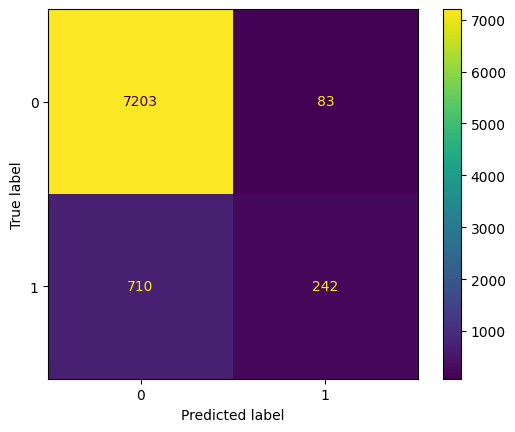

In [14]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [17]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9037387715464918
Precision: 0.7446153846153846
Recall: 0.2542016806722689
F1-Score: 0.3790133124510572
